<h1> Report on activities performed during machine learning on the basis of data received during project execution<h1>


After the data from the scraping was obtained, it was meticulously cleaned .
In the beginning, all records were uploaded to the database, and waited to be cleaned.
Each offer was saved in the same format that allowed for efficient processing.
Then the offers that did not have a salary cell and features that were necessry to do the Machine Learning were thrown out.

Cleaning the technology consisted in creating histograms of the occurrences of each technology, those whose number of occurrences 
was less than the threshold, these were thrown out. The fields that did not contain technologies or languages or were there by accident were thrown out too. It was done in a very simple way - those records that had more than 3 whitespaces those were dropped.
![alt text](https://scontent-waw1-1.xx.fbcdn.net/v/t1.15752-9/99371840_250299496186259_2888626533197414400_n.png?_nc_cat=105&_nc_sid=b96e70&_nc_oc=AQmYNU4aMHCZahxPZT3cuedlTGQAGB7Rl8i78RyBcP0IL3gnrHNK2czmNh4_AcTBxf8&_nc_ht=scontent-waw1-1.xx&oh=e5e6c6c5a06d292bbcc43822f09c564f&oe=5F11F5D1)

This way, a list of languages and technologies was extracted, which served as column names for DataFrames, used for model training. Next step was one hot encoding which was 
conducted by our own function. 


Used Models:


*  Decision Tree Regression
*Decision Tree Classification
*xgboost
*Ada Booster
*Voting Machines
*Cross Validation

First the regression was done with DecisionTreeRegresor.

* Number of variables: approx. 700

* Efficiency: coefficient R^2 = 0.49 (best)

* The number of variables was then reduced to 50

Doing that, the R^2 factor hasn't changed but even decreased, while performing the training.
The results obtained were examined at various tree depths. It turned out that for depth=14
the tree was doing best.

Then AdaBoost was dormant to use, unfortunately with poor results, because
the best results were between 0.2 and 0.3 for R^2

After these failures, tactics were changed. 


Tree obtained during Decision Tree Regression.
![alt text](https://user-images.githubusercontent.com/61584575/83249384-c598f400-a1a6-11ea-8064-b964196289d9.png)

Custom one hot encoding: 

```
def counter(feature_name, element_name, database):
    truth_list = []

    for row in database:
        help_list = []
        if row[feature_name]:
            for item in row[feature_name]:
                if element_name.lower() == item.lower():
                    help_list.append(1)
                else:
                    help_list.append(0)
        else:
            truth_list.append(0)

        if help_list:
            if 1 in help_list:
                truth_list.append(1)
            else:
                truth_list.append(0)


    return truth_list
```



```

def df_updater_str(df, iterated_list, database):
    for to_count in iterated_list:
        df[to_count] = counter_str(to_count, database)

    return df
```

These functions encoded features. There is prepared list of technologies, cities, laguages, postitions etc. that is being used in our model. Every incoming offer was analysed to check whether it has these features. If it does then in the cell appears 1, if not - 0. It was not done by built-in functions
due to the fact, that some of technologies that were already in dataset were 
useless for our model, it was decided to extract only valuable features. What's more we had nested lists in dataframe cells so 
it was unclear how to solve this problem. Building own functions did it.



After many failures with regression
classification of job-offers was performed:

```
df["salary"] = df["salary"].astype(str)

for i in df.index:
    a = int(df.at[i, "salary"])
    if a < 3000:
        df.at[i, "salary"] = "<3000"
        continue
    if 3000 <= a and a < 6000:
        df.at[i, "salary"] = "[3000, 6000)"
        continue
    if 6000 <= a and a < 8000:
        df.at[i, "salary"] = "[6000, 8000)"
        continue
    if 8000 <= a and a < 10000:
        df.at[i, "salary"] = "[8000, 10000)"
        continue
    if 10000 <= a and a < 12000:
        df.at[i, "salary"] = "[10000, 12000)"
        continue
    if 12000 <= a and a < 14000:
        df.at[i, "salary"] = "[12000, 14000)"
        continue
    if 14000 <= a and a < 16000:
        df.at[i, "salary"] = "[14000, 16000)"
        continue
    if 16000 <= a and a < 18000:
        df.at[i, "salary"] = "[16000, 18000)"
        continue
    if 18000 <= a and a < 21000:
        df.at[i, "salary"] = "[18000, 21000)"
        continue
    if 21000 <= a and a < 24000:
        df.at[i, "salary"] = "[21000, 24000)"
        continue
    if 24000 < a:
        df.at[i, "salary"] = "24000<"
```
---
Wider classes:
```
for i in df.index:
    a = int(df.at[i, "salary"])
    if a < 5000:
        df.at[i, "salary"] = "<5000"
        continue
    if 5000 <= a < 10000:
        df.at[i, "salary"] = "[5000, 10000)"
        continue
    if 10000 <= a < 15000:
        df.at[i, "salary"] = "[10000, 15000)"
        continue
    if 15000 <= a < 20000:
        df.at[i, "salary"] = "[15000, 20000)"
        continue
    if 20000 <= a:
        df.at[i, "salary"] = "20000<"
```

Second option gave better results. Wider ranges caused that model was more accurate with it's predictions.

**XGBoost**

This configuration resulted in 74% accuracy score. Using xgboost boosted our prediction model.

Dataset: Adrian-made one

Classes: every 5k zlotys

Additional info:
Division into "b2b" and "uop" type of offers. Every treated searately (2 models).

```
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = XGBClassifier(max_depth=16,
                      subsample=0.8,
                      n_estimators=100,
                      learning_rate=0.5,
                      min_child_weight=1,
                      random_state=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
pd.crosstab(y_test, y_predict)
```

Our project resulted in quite interesting outcomes. We learned which technologies are most wanted now, what language to learn in order to easily find a job. Our models are not perfect but during Machine Learing process actually we learned more than the machines. Now we know how to deal with unordered, potholed datasets. String extraction from text is now no challenge for us, spliting, encoding, reducing datasets is our bread and butter. We are happy that we could take a part in such a great project.

# Decision Tree Regression

In [9]:
import json
import numpy as np
import pandas as pd
import copy
import csv


from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('/content/drive/My Drive/PITE/cleaned.csv').drop(["Unnamed: 0"],axis=1)

print(df.head(20))

X_encoded = df.drop('salary', axis=1).copy()
y = df['salary'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

    size  salary  b2b  uop  gdańsk  ...  laravel  mongo  vue  rust  express
0   1007   15000    0    1       0  ...        0      0    0     0        0
1   1007   14000    0    1       1  ...        0      0    0     0        0
2   1007   19050    0    1       0  ...        0      0    0     0        0
3   1007   10500    0    1       0  ...        0      0    0     0        0
4   1007   12500    0    1       0  ...        0      0    0     0        0
5   1007   12500    0    1       0  ...        0      0    0     0        0
6   1007   12500    0    1       0  ...        0      0    0     0        0
7   1007   12500    0    1       1  ...        0      0    0     0        0
8   1007   12500    0    1       0  ...        0      0    0     0        0
9   1007    8500    0    1       0  ...        0      0    0     0        0
10  1007   20000    0    1       0  ...        0      0    0     0        0
11  1007   10500    0    1       0  ...        0      0    0     0        0
12  1007   1

Then plot of alpha agains score were created in order to show how prediciton quality behave for both training and testing datasets depending on cpp_alpha (cost complexity prunning alpha).

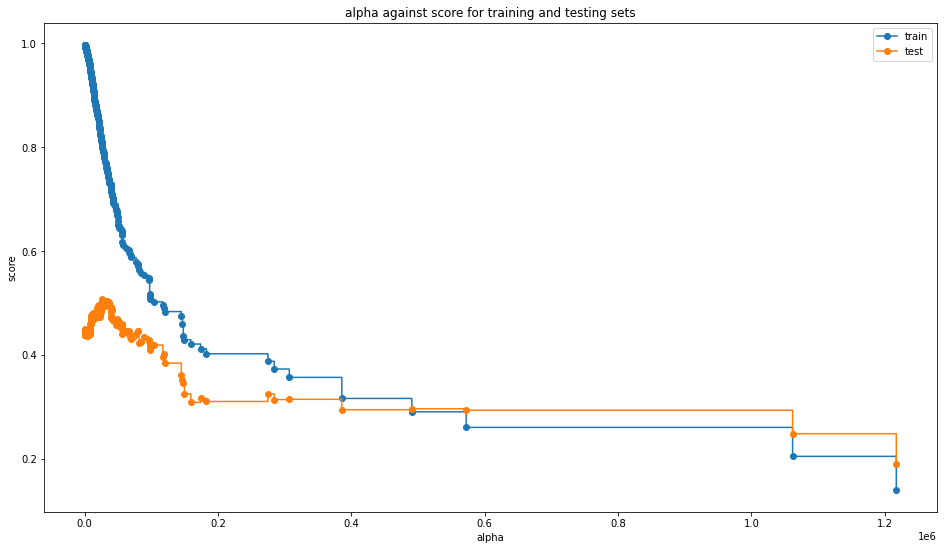

In [10]:
regr = DecisionTreeRegressor(random_state=20)
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

path = regr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

regr_list = []

for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    regr_list.append(reg)


train_scores = [reg.score(X_train, y_train) for reg in regr_list]
test_scores = [reg.score(X_test, y_test) for reg in regr_list]


fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel('alpha')
ax.set_ylabel('score')
ax.set_title('alpha against score for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

Then precisious plot of alpha against score were made to extract the best one, giving the greatest possible score.

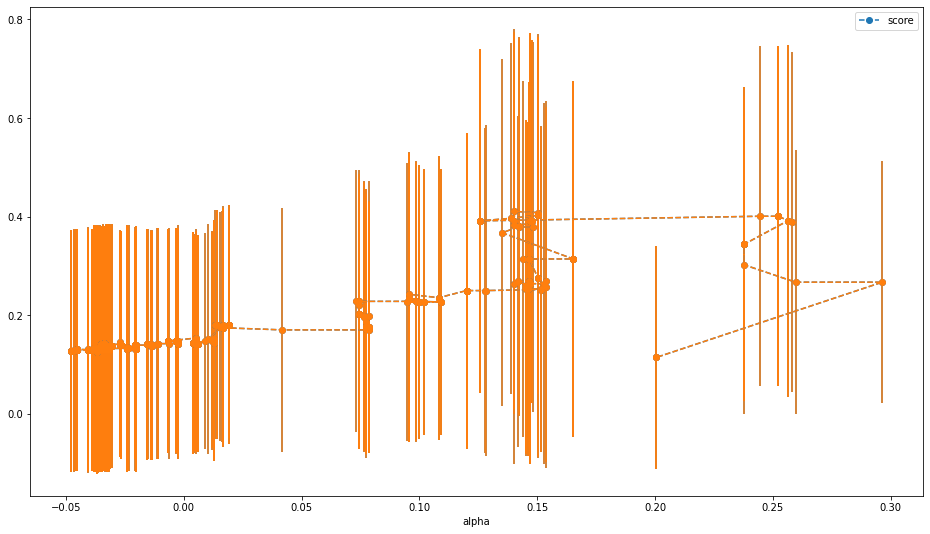

In [8]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(reg, X_train, y_train, cv=3)
    alpha_loop_values.append(scores)


alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'score', 'std'])
alpha_results.plot(x='alpha', y='score', yerr='std', marker='o', linestyle='--', figsize=(16,9))
plt.errorbar(x=alpha_results['alpha'], y=alpha_results['score'], yerr=alpha_results['std'], marker='o', linestyle='--')
plt.show()

In [5]:
print(alpha_results[550:560])
best_alpha = 0.140267

        alpha     score       std
550  0.147000  0.390159  0.382133
551  0.147000  0.390159  0.382133
552  0.148041  0.378962  0.375367
553  0.142385  0.378962  0.382711
554  0.142385  0.381008  0.382711
555  0.140267  0.383267  0.382711
556  0.140267  0.391742  0.382711
557  0.140267  0.410457  0.370418
558  0.150357  0.408118  0.362221
559  0.150357  0.402566  0.362221


We created two functions in order to both calculate the accuracy and plot results in our custom way and trained RandomForestTree:


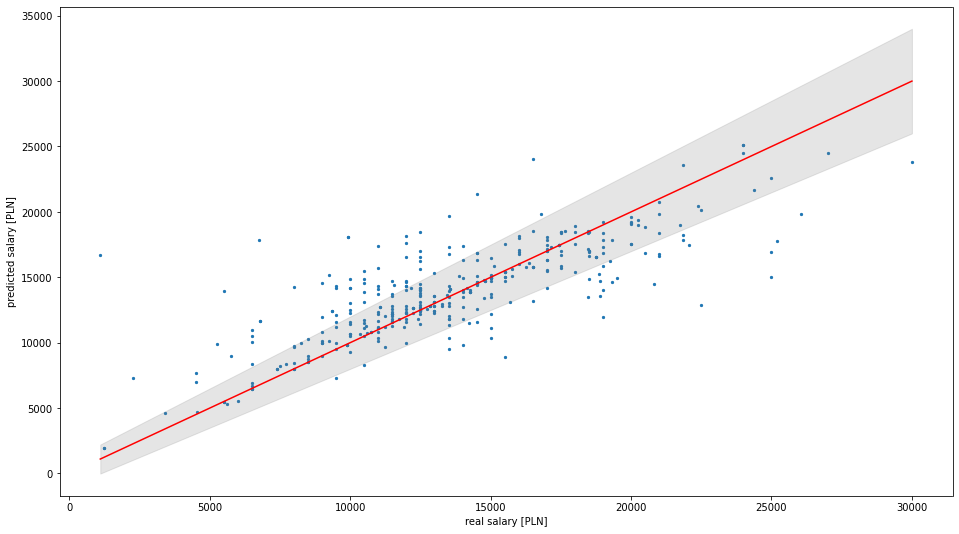

In [29]:
def print_accuracy(target, pred, error_percent, error_fixed):
    accurate_count = 0
    for real, pred in zip(target, pred):
        if real*(1 - error_percent/100) - error_fixed <= pred <= real*(1 + error_percent/100) + error_fixed:
            accurate_count += 1
    print('accurate shots: ', accurate_count)
    print('total test count: ', len(target))
    print('accuracy: ', accurate_count/len(target))


def generate_accuracy_plot(target, pred, error_percent, error_fixed):
    target, pred = zip(*sorted(zip(target, pred)))
    target, pred = (list(t) for t in zip(*sorted(zip(target, pred))))

    lower_bound = [value*(1 - error_percent/100) - error_fixed for value in target]
    upper_bound = [value*(1 + error_percent/100) + error_fixed for value in target]

    plt.figure(figsize=(16,9))
    plt.xlabel("real salary [PLN]")
    plt.ylabel("predicted salary [PLN]")
    plt.scatter(target, pred, s=5)
    plt.plot(target, target, '-r')
    plt.fill_between(target, lower_bound, upper_bound, color="gray", alpha=0.2)

    plt.show()
    
# pruned_regr = RandomForestRegressor(n_estimators=300, ccp_alpha=best_alpha, max_depth=19, min_samples_split=4, min_samples_leaf=2)
pruned_regr = RandomForestRegressor(n_estimators=300, ccp_alpha=best_alpha)
pruned_regr.fit(X_train, y_train)
predicted = pruned_regr.predict(X_test)

generate_accuracy_plot(y_test, predicted, 10, 1000)

The red line on the plot above represents prefect prediction pattern. Gray area is deviation from teh perfect prediction with given tolerance, where the tolerance contains two factors: fixed value (1000 PLN) and percentage value that then is added/subtracted from the salary to create kind of forks that are linear dependant of the actual salary value.

In [30]:
print_accuracy(y_test, predicted, 10, 1000)

accurate shots:  274
total test count:  376
accuracy:  0.7287234042553191


Received outcome isn't perfect but it allows to make some predictions and receive salary relatively close to real one.

Last step was to perform gridsearch to find the most satisfying hyperparameters for our regression:

In [28]:
from sklearn.model_selection import GridSearchCV 

max_depths = [11,13,15,17,19,21, 23]
min_samples_leaf = [1,2,3,4,5,6,7]
min_samples_split = [3,4,5,6,7,8,9,10]

grid_params = {
    'max_depth': max_depths,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split
}

regressor = DecisionTreeRegressor(ccp_alpha=best_alpha)
# regressor = RandomForestRegressor(ccp_alpha=best_alpha, n_estimators=300)

grid_src = GridSearchCV(
    estimator=regressor,
    param_grid=grid_params,
    cv=5,
    n_jobs=-1
)

grid_src.fit(X_train, y_train)

best_params = grid_src.best_params_
print(best_params)

best_score = grid_src.best_score_
print(best_score)

{'max_depth': 13, 'min_samples_leaf': 7, 'min_samples_split': 9}
0.36783668295335953


Once again model were trained, this time using most optimal hyperparameters given by performed gridsearch:

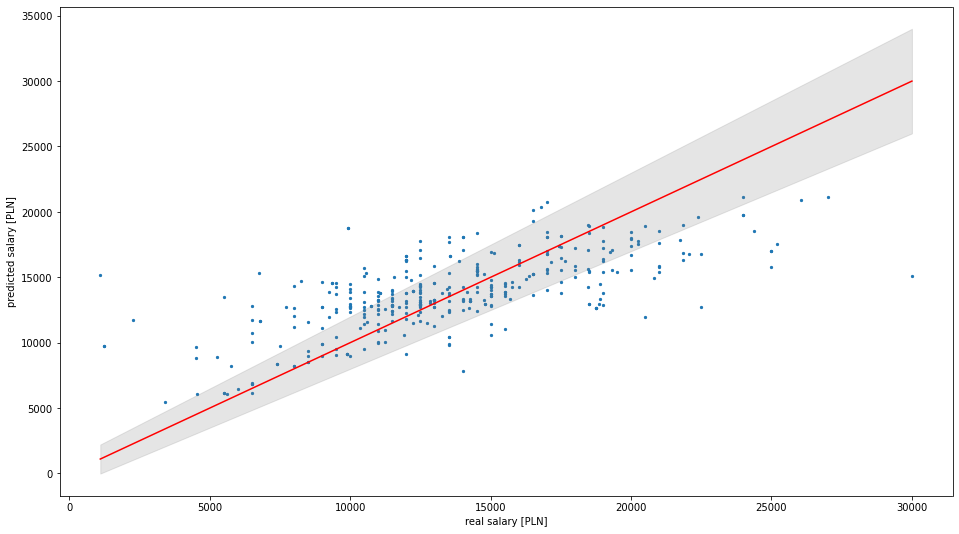

accurate shots:  225
total test count:  376
accuracy:  0.598404255319149


In [34]:
optimized_regr = RandomForestRegressor(n_estimators=300, ccp_alpha=best_alpha, max_depth=13, min_samples_split=9, min_samples_leaf=7)
optimized_regr.fit(X_train, y_train)
predicted = optimized_regr.predict(X_test)

generate_accuracy_plot(y_test, predicted, 10, 1000)
print_accuracy(y_test, predicted, 10, 1000)

Well, results have around 14% fewer accuracy so something definately gone wrong, it looks like regression performs better with only ccp_alpha parameter given that with teh whole set of other ones.